In [156]:
## Klein-Monti υποδειγμα ως Stackelberg

In [157]:
import sympy as sp
from sympy import init_printing # Το init_printing εισάγει το LaTeX printing
init_printing(use_latex='mathjax')
import math
from sympy.plotting import plot3d, plot



In [158]:
#Εισαγωγή βασικών και μεταβλητών και παραμέτρων
rD, rL, r = sp.var('rD,rL,r',real=True); #Επιτόκια rD (καταθέσεων), rL (χορηγήσεων), r (παρέμβασης)
D1, D2, L1, L2 = sp.var('D1,D2,L1,L2', real=True); #Καταθέσεις (D) και Χορηγήσεις (L)
q = sp.var('q', real=True); # Παράμετρος υποχρεωτικών ρευστών διαθεσίμων
#Συνολικές Χορηγήσεις
L = L1 + L2
D = D1 + D2
# Αντίστροφη συνάρτηση χορηγήσεων
A, a = sp.var('A,a', real=True); #Παράμετροι αντίστροφης συνάρτησης χορηγήσεων
invrL = A-a*L 
#Αντίστροφη Συνάρτηση καταθέσεων
B,b = sp.var('B,b', real=True); #Παράμετροι αντίστροφης συνάρτησης καταθέσεων
invrD = B +b*D
#Συνάρτηση κόστους
d1, d2,g1, g2 =sp.var('d1, d2, g1,g2', real=True); # Παράμετροι συνάρτησης κόστους
cost1 = d1*L1 + g1*D1
cost2 = d2*L2 + g2*D2

Όρίζουμε την συνάρτηση κόστους να είναι γραμμική. Επίσης ορίζουμε το κόστος να είναι διαφορετικό μεταξύ των δύο τραπεζών. Αναμένουμε η ηγετιδα τράπεζα να έχει μικρότερο οριακό κόστος από την ακόλουθο.

In [159]:
invrL, invrD, cost1, cost2

(A - a⋅(L₁ + L₂), B + b⋅(D₁ + D₂), D₁⋅g₁ + L₁⋅d₁, D₂⋅g₂ + L₂⋅d₂)

Συνάρτηση κέρδους για την ηγέτιδα (Τράπεζα 1) και την ακόλουθο τράπεζα (Τράπεζα 2).

In [160]:
#Συνάρτηση κέρδους για την ηγέτιδα τράπεζα.
profit1 = (invrL -r)*L1 + ((1-q)*r -invrD)*D1 -cost1
profit2 = (invrL -r)*L2 + ((1-q)*r -invrD)*D2 -cost2

profit2.expand()

                          2                                         2         
A⋅L₂ - B⋅D₂ - D₁⋅D₂⋅b - D₂ ⋅b - D₂⋅g₂ - D₂⋅q⋅r + D₂⋅r - L₁⋅L₂⋅a - L₂ ⋅a - L₂⋅d

        
₂ - L₂⋅r

In [161]:
#Λύση μαθηματικού προγράμματος τράπεζας β2
#Αναγκαίες συνθήκες πρώτης τάξης 
dprofit2L2 = sp.diff(profit2,L2) 
dprofit2D2 = sp.diff(profit2,D2) 

dprofit2L2, dprofit2D2

(A - L₂⋅a - a⋅(L₁ + L₂) - d₂ - r, -B - D₂⋅b - b⋅(D₁ + D₂) - g₂ + r⋅(1 - q))

In [162]:
L22 = sp.solve(dprofit2L2, L2)
D22 = sp.solve(dprofit2D2, D2)
L22, D22

⎛⎡A - L₁⋅a - d₂ - r⎤  ⎡-B - D₁⋅b - g₂ - q⋅r + r⎤⎞
⎜⎢─────────────────⎥, ⎢────────────────────────⎥⎟
⎝⎣       2⋅a       ⎦  ⎣          2⋅b           ⎦⎠

In [163]:
#eqx2 = b2[0].xreplace({x1: eqx1[0]})
profitLeader = profit1.xreplace({L2:L22[0], D2:D22[0]})

profitLeader.expand()


                2                                       2                     
A⋅L₁   B⋅D₁   D₁ ⋅b           D₁⋅g₂   D₁⋅q⋅r   D₁⋅r   L₁ ⋅a           L₁⋅d₂   
──── - ──── - ───── - D₁⋅g₁ + ───── - ────── + ──── - ───── - L₁⋅d₁ + ───── - 
 2      2       2               2       2       2       2               2     

    
L₁⋅r
────
 2  

Στην συνέχεια μεγιστοποιώ την συνάρτηση κέρδους της ηγέτιδος ως προς τις στρατηγικές μεταβλητές της.

In [164]:
L1star = sp.solve(sp.diff(profitLeader,L1), L1)
L1star

⎡A - 2⋅d₁ + d₂ - r⎤
⎢─────────────────⎥
⎣       2⋅a       ⎦

In [165]:
D1star = sp.solve(sp.diff(profitLeader,D1), D1)
D1star

⎡-B - 2⋅g₁ + g₂ - q⋅r + r⎤
⎢────────────────────────⎥
⎣          2⋅b           ⎦

Επιστρέφω τώρα στον ακόλουθο, για να υπολογίσω την βέλτιστη λύση, όπως υπολογίστηκε μετην προς τα πίσω επάγωγή.

In [166]:
L2star = L22[0].xreplace({L1:L1star[0]})
L2star.factor()

-(-A - 2⋅d₁ + 3⋅d₂ + r) 
────────────────────────
          4⋅a           

In [167]:
D2star = D22[0].xreplace({D1:D1star[0]})
D2star.factor()

-(B - 2⋅g₁ + 3⋅g₂ + q⋅r - r) 
─────────────────────────────
             4⋅b             

### Υπολογισμός Αριθμητικού Παραδείγματος

Υποθέστε τιμές σε εκ.ευρώ

In [168]:
vals = {B:0.01, b:0.0001, A:1, a:0.0002, r:0.05, d1:0.0002, d2:0.0003, g1:0.0001, g2:0.0002, q:0.03}


L1star[0].subs(vals), D1star[0].subs(vals), L2star.subs(vals), D2star.subs(vals)

(2374.75, 192.5, 1186.875, 95.25)

Το ύψος των χορηγήσεων της ηγέτιδος τράπεζας είναι 2374,75 εκ. ευρώ ενώ για την ακόλουθο είναι 1186,875 εκ. ευρώ. Αντίστοιχα οι καταθέσεις της ηγέτιδος είναι 192.5 εκ. και όμοια για την ακόλουθο είναι 95.25 εκ.

In [169]:
# Υπολογίζουμε τα αθροιστικά μεγέθη για τις χορηγήσεις και τις καταθέσεις
Lstar = L1star[0].subs(vals) + L2star.subs(vals)
Dstar = D1star[0].subs(vals) + D2star.subs(vals)


invrL.xreplace({L:Lstar}).subs(vals) , invrD.xreplace({D:Dstar}).subs(vals)

(0.287675, 0.038775)

### Διαγράμματα Βέλτιστης Αντίδρασης

In [170]:
#responseL1 = sp.lambdify(L2, L1star[0].subs(vals), modules=['numpy'])
def responseL1(x):
    return np.full(x.shape, 2374.75) #Το επίπεδο χορηγήσεων της ηγέτιδος τράπεζας
# Έδώ έχουμε χρησιμοποιήσει την εντολή numpy.full ωστε να μας γυρνάει η συνάρτηση ένα διάνυσμα ίσης διάστασης
# με την διάσταση των τιμών των x , δηλ τα x_values 
responseL2 = sp.lambdify(L1, L22[0].subs(vals), modules=['numpy'])

x_vals = np.linspace(1, 4000, 100)
y_vals = responseL1(x_vals)
z_vals = responseL2(x_vals)


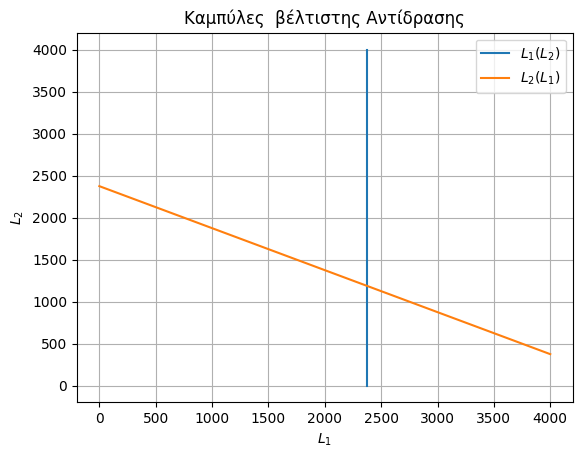

In [171]:
#Διάγραμμα

plt.plot(y_vals, x_vals, x_vals, z_vals)

#plt.plot(x_vals, y_vals, 'r')
plt.title('Καμπύλες  βέλτιστης Αντίδρασης')
plt.grid(True)
plt.ylabel("$L_2$")
plt.xlabel("$L_1$")
plt.legend(['$L_1(L_2)$', '$L_2(L_1)$'])
plt.show()

In [172]:
#responseL1 = sp.lambdify(L2, L1star[0].subs(vals), modules=['numpy'])
def responseD1(x):
    return np.full(x.shape, 192.5) #Το επίπεδο χορηγήσεων της ηγέτιδος τράπεζας
# Έδώ έχουμε χρησιμοποιήσει την εντολή numpy.full ωστε να μας γυρνάει η συνάρτηση ένα διάνυσμα ίσης διάστασης
# με την διάσταση των τιμών των x , δηλ τα x_values 
responseD2 = sp.lambdify(D1, D22[0].subs(vals), modules=['numpy'])

x_vals = np.linspace(1, 400, 100)
y_vals = responseD1(x_vals)
z_vals = responseD2(x_vals)


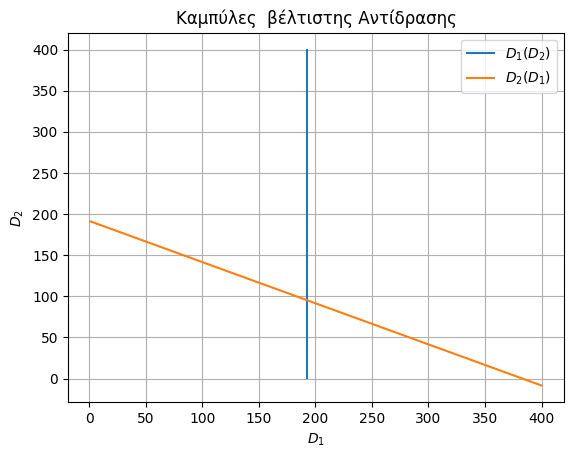

In [173]:
#Διάγραμμα

plt.plot(y_vals, x_vals, x_vals, z_vals)

#plt.plot(x_vals, y_vals, 'r')
plt.title('Καμπύλες  βέλτιστης Αντίδρασης')
plt.grid(True)
plt.ylabel("$D_2$")
plt.xlabel("$D_1$")
plt.legend(['$D_1(D_2)$', '$D_2(D_1)$'])
plt.show()